In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

# Load the CSV dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/695WS/adult.csv')

In [ ]:
# Encode categorical variables as numeric values
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Split the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
# Create a decision tree classifier with default hyperparameters
# dtc = DecisionTreeClassifier(criterion='entropy')
dtc = DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=2)

# Train the decision tree classifier on the training set
dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Evaluate the performance of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8562800696079435
Confusion matrix:
 [[6826  595]
 [ 809 1539]]


In [ ]:
for max_depth in range(4,12):
  for min_samples_leaf in range(1,5):
    for min_samples_split in range (2,5):

      dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split)
      dtc.fit(X_train, y_train)
      y_pred = dtc.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      # confusion = confusion_matrix(y_test, y_pred)
      # print(i)
      # print("max_depth", max_depth, "min_samples_leaf", min_samples_leaf, "min_samples_split", min_samples_split, "Accuracy:", round(accuracy*100, 3))
      print("max_depth", max_depth, "min_samples_leaf", min_samples_leaf, "min_samples_split", min_samples_split, "Accuracy:", round(f1*100, 3))
      # print("Confusion matrix:\n", confusion)

max_depth 4 min_samples_leaf 1 min_samples_split 2 Accuracy: 61.073
max_depth 4 min_samples_leaf 1 min_samples_split 3 Accuracy: 61.073
max_depth 4 min_samples_leaf 1 min_samples_split 4 Accuracy: 61.073
max_depth 4 min_samples_leaf 2 min_samples_split 2 Accuracy: 61.073
max_depth 4 min_samples_leaf 2 min_samples_split 3 Accuracy: 61.073
max_depth 4 min_samples_leaf 2 min_samples_split 4 Accuracy: 61.073
max_depth 4 min_samples_leaf 3 min_samples_split 2 Accuracy: 61.097
max_depth 4 min_samples_leaf 3 min_samples_split 3 Accuracy: 61.097
max_depth 4 min_samples_leaf 3 min_samples_split 4 Accuracy: 61.097
max_depth 4 min_samples_leaf 4 min_samples_split 2 Accuracy: 61.097
max_depth 4 min_samples_leaf 4 min_samples_split 3 Accuracy: 61.097
max_depth 4 min_samples_leaf 4 min_samples_split 4 Accuracy: 61.097
max_depth 5 min_samples_leaf 1 min_samples_split 2 Accuracy: 62.897
max_depth 5 min_samples_leaf 1 min_samples_split 3 Accuracy: 62.897
max_depth 5 min_samples_leaf 1 min_samples_split

In [ ]:
for max_depth in range(4,10):

      dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf= 4, min_samples_split=2)
      dtc.fit(X_train, y_train)
      y_pred = dtc.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      # confusion = confusion_matrix(y_test, y_pred)
      # print(i)
      print("max_depth", max_depth, "min_samples_leaf", min_samples_leaf, "min_samples_split", min_samples_split, "Accuracy:", round(accuracy*100, 3))
      # print("max_depth", max_depth, "min_samples_leaf", min_samples_leaf, "min_samples_split", min_samples_split, "Accuracy:", round(f1*100, 3))
      # print("Confusion matrix:\n", confusion)

max_depth 4 min_samples_leaf 4 min_samples_split 4 Accuracy: 84.522
max_depth 5 min_samples_leaf 4 min_samples_split 4 Accuracy: 85.178
max_depth 6 min_samples_leaf 4 min_samples_split 4 Accuracy: 85.331
max_depth 7 min_samples_leaf 4 min_samples_split 4 Accuracy: 85.556
max_depth 8 min_samples_leaf 4 min_samples_split 4 Accuracy: 85.648
max_depth 9 min_samples_leaf 4 min_samples_split 4 Accuracy: 85.577


In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
# Create dummy variables for categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'gender','native-country']
df = pd.get_dummies(df, columns=categorical_features)

In [ ]:
# Split the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
for max_depth in range(10,15):
  for min_samples_leaf in range(1,5):
    for min_samples_split in range (2,5):

      dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split)
      dtc.fit(X_train, y_train)
      y_pred = dtc.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      # confusion = confusion_matrix(y_test, y_pred)
      # print(i)
      # print("max_depth", max_depth, "min_samples_leaf", min_samples_leaf, "min_samples_split", min_samples_split, "Accuracy:", round(accuracy*100, 3))
      print("max_depth", max_depth, "min_samples_leaf", min_samples_leaf, "min_samples_split", min_samples_split, "Accuracy:", round(f1*100, 3))
      # print("Confusion matrix:\n", confusion)

max_depth 10 min_samples_leaf 1 min_samples_split 2 Accuracy: 65.734
max_depth 10 min_samples_leaf 1 min_samples_split 3 Accuracy: 65.699
max_depth 10 min_samples_leaf 1 min_samples_split 4 Accuracy: 65.78
max_depth 10 min_samples_leaf 2 min_samples_split 2 Accuracy: 65.679
max_depth 10 min_samples_leaf 2 min_samples_split 3 Accuracy: 65.532
max_depth 10 min_samples_leaf 2 min_samples_split 4 Accuracy: 65.499
max_depth 10 min_samples_leaf 3 min_samples_split 2 Accuracy: 65.843
max_depth 10 min_samples_leaf 3 min_samples_split 3 Accuracy: 65.793
max_depth 10 min_samples_leaf 3 min_samples_split 4 Accuracy: 65.828
max_depth 10 min_samples_leaf 4 min_samples_split 2 Accuracy: 65.978
max_depth 10 min_samples_leaf 4 min_samples_split 3 Accuracy: 65.962
max_depth 10 min_samples_leaf 4 min_samples_split 4 Accuracy: 65.993
max_depth 11 min_samples_leaf 1 min_samples_split 2 Accuracy: 65.987
max_depth 11 min_samples_leaf 1 min_samples_split 3 Accuracy: 65.972
max_depth 11 min_samples_leaf 1 min

In [ ]:
# Create a decision tree classifier with default hyperparameters
# dtc = DecisionTreeClassifier(criterion='entropy')
dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2)

# Train the decision tree classifier on the training set
dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Evaluate the performance of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8562800696079435
Confusion matrix:
 [[6874  547]
 [ 857 1491]]


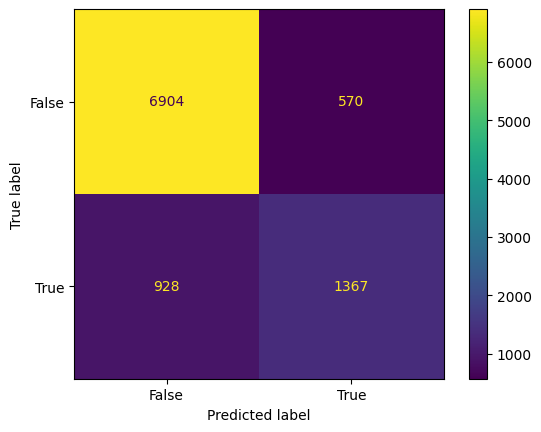

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.show(cm_display)

# cm = confusion#_matrix(y_test, y_pred)
# cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# # create a figure and axes objects
# fig, ax = plt.subplots()

# # plot the confusion matrix with shaded colors
# im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# # add colorbar
# cbar = ax.figure.colorbar(im, ax=ax)

In [ ]:
# # Convert integer columns to strings
# int_cols = [col for col in df.columns if df[col].dtype == 'int64']
# for col in int_cols:
#     df[col] = df[col].astype(str)

# # Split the dataset into features and target variable
# X = df.drop('income', axis=1)
# y = df['income']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a decision tree classifier with default hyperparameters
# dtc = DecisionTreeClassifier()

# # Train the decision tree classifier on the training set
# dtc.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = dtc.predict(X_test)

# # Evaluate the performance of the decision tree classifier
# accuracy = accuracy_score(y_test, y_pred)
# confusion = confusion_matrix(y_test, y_pred)

# # Print the accuracy and confusion matrix
# print("Accuracy:", accuracy)
# print("Confusion matrix:\n", confusion)

# # Visualize the decision tree using Graphviz
# dot_data = export_graphviz(dtc, out_file=None, 
#                            feature_names=X.columns,  
#                            class_names=y.unique(),  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("decision_tree")  # Save the decision tree as a PDF file


In [ ]:
tree_text = export_text(dtc, feature_names=list(X_train.columns))
print(tree_text)

|--- relationship <= 0.50
|   |--- educational-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- educational-num <= 8.50
|   |   |   |   |--- hours-per-week <= 49.50
|   |   |   |   |   |--- capital-loss <= 1794.00
|   |   |   |   |   |   |--- occupation <= 9.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- occupation >  9.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- capital-loss >  1794.00
|   |   |   |   |   |   |--- capital-loss <= 1989.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- capital-loss >  1989.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours-per-week >  49.50
|   |   |   |   |   |--- age <= 43.50
|   |   |   |   |   |   |--- workclass <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- workclass >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  43.50
|   |   |   |   |   |   |--- hours-per-week <= 53.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create the decision tree classifier with default hyperparameters
clf = DecisionTreeClassifier()

# define the hyperparameters to search over
hyperparameters = {'max_depth': [5, 6, 7, 8, 10], 
                   'min_samples_split': [1, 2, 3, 4],
                   'min_samples_leaf': [1, 2, 3, 4, 5]}

# perform grid search with cross-validation
grid_search = GridSearchCV(clf, hyperparameters, cv=5)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
test_score = grid_search.score(X_test, y_test)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Test score: ", test_score)

Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.8561152849823659
Test score:  0.8560753403623708


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_

In [ ]:
# Create Married Column - Binary Yes(1) or No(0)
df["marital-status"] = df["marital-status"].replace(['Never-married','Divorced','Separated','Widowed','Married-spouse-absent'], 0)
df["marital-status"] = df["marital-status"].replace(['Married-civ-spouse','Married-AF-spouse'], 1)

# Create Realtionship Column - Binary Yes(1) or No(0)
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 1)
df['relationship'] = df['relationship'].replace(['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried'], 0)